# Imports

In [1]:
import numpy as np
from hmagnet import HMagNet, config

import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of CPU cores

In [2]:
config(jobs=6)

# Synthetize spectra

In [3]:
net = HMagNet("tiny")

# teff, logg, mh, bfield, vsini
x = np.array([3587.42, 3.33, 0.15, 3.27, 14.52])

spectrum = net.synthetize_spectra(x)
print(spectrum.shape)

No GPU detected, using CPU.
(1, 1328)


## Plot synthetic spectra

<Axes: >

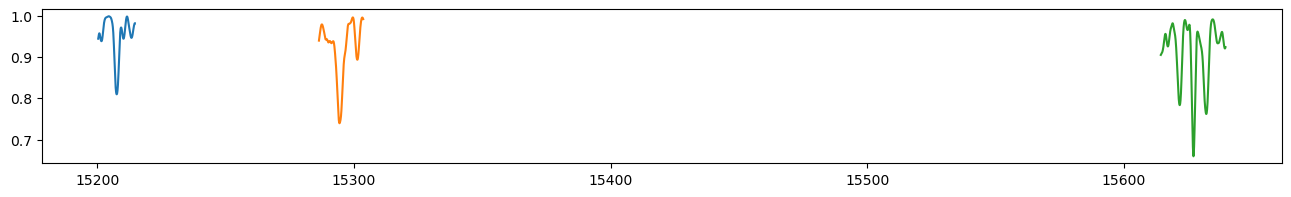

In [4]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False)

# Inversion

In [5]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.0001475766878328964
----------------------------
Iteration: 2   Best Fitness: 5.6786967228817325e-05
----------------------------
Iteration: 3   Best Fitness: 2.874770225361651e-05
----------------------------
Iteration: 4   Best Fitness: 5.427791744000258e-06
----------------------------
Iteration: 5   Best Fitness: 3.4575511303795145e-06
----------------------------
Iteration: 6   Best Fitness: 2.233397103113104e-06
----------------------------
Iteration: 7   Best Fitness: 1.969407211320237e-06
----------------------------
Iteration: 8   Best Fitness: 1.8863154311160569e-06
----------------------------
Iteration: 9   Best Fitness: 1.2401932694269894e-06
----------------------------
Iteration: 10   Best Fitness: 8.425193856255597e-07
----- End PSO -----
Best Fitness: 8.425193856255597e-07

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3587.35 | 3.40   | 0.18   | 3.21    | 14.69   |
        


## Plot observed versus inversion spectra solution

<Axes: >

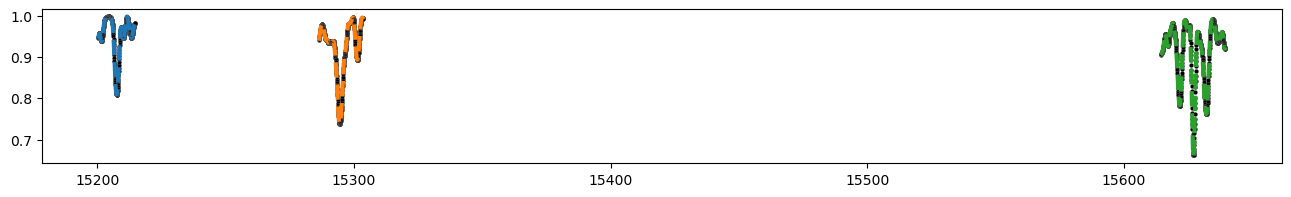

In [27]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, color='blue', linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra[0], s=10, linewidth=0.1, color='black')

# Make new objective function

In [28]:
from sklearn.metrics import mean_absolute_error
def obj(y_true, y_pred):
    return mean_absolute_error(y_true.T, y_pred.T, multioutput='raw_values')

## Inversion

In [29]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, objective_function=obj, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.008463891696014253
----------------------------
Iteration: 2   Best Fitness: 0.006493150504150321
----------------------------
Iteration: 3   Best Fitness: 0.004177409514344353
----------------------------
Iteration: 4   Best Fitness: 0.003032905688078343
----------------------------
Iteration: 5   Best Fitness: 0.0024562337439414713
----------------------------
Iteration: 6   Best Fitness: 0.0021374157187999633
----------------------------
Iteration: 7   Best Fitness: 0.002056033469711628
----------------------------
Iteration: 8   Best Fitness: 0.0015820064234814523
----------------------------
Iteration: 9   Best Fitness: 0.0013740756428031256
----------------------------
Iteration: 10   Best Fitness: 0.0009273218062632553
----- End PSO -----
Best Fitness: 0.0009273218062632553

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3587.27 | 3.44   | 0.19   | 3.29    | 14.27   |
        


## Plot observed versus inversion spectra solution

<Axes: >

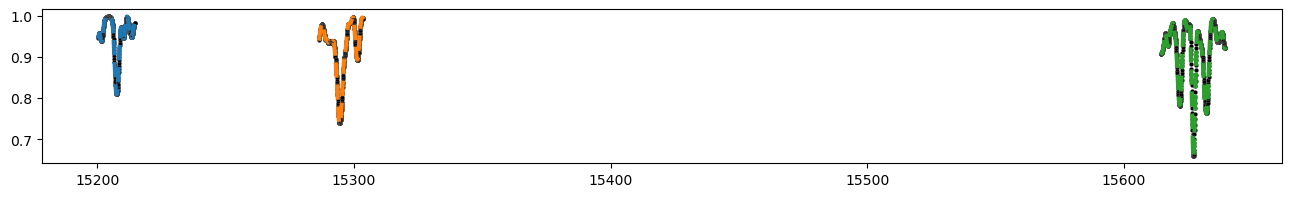

In [30]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, color='blue', linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra[0], s=10, linewidth=0.1, color='black')